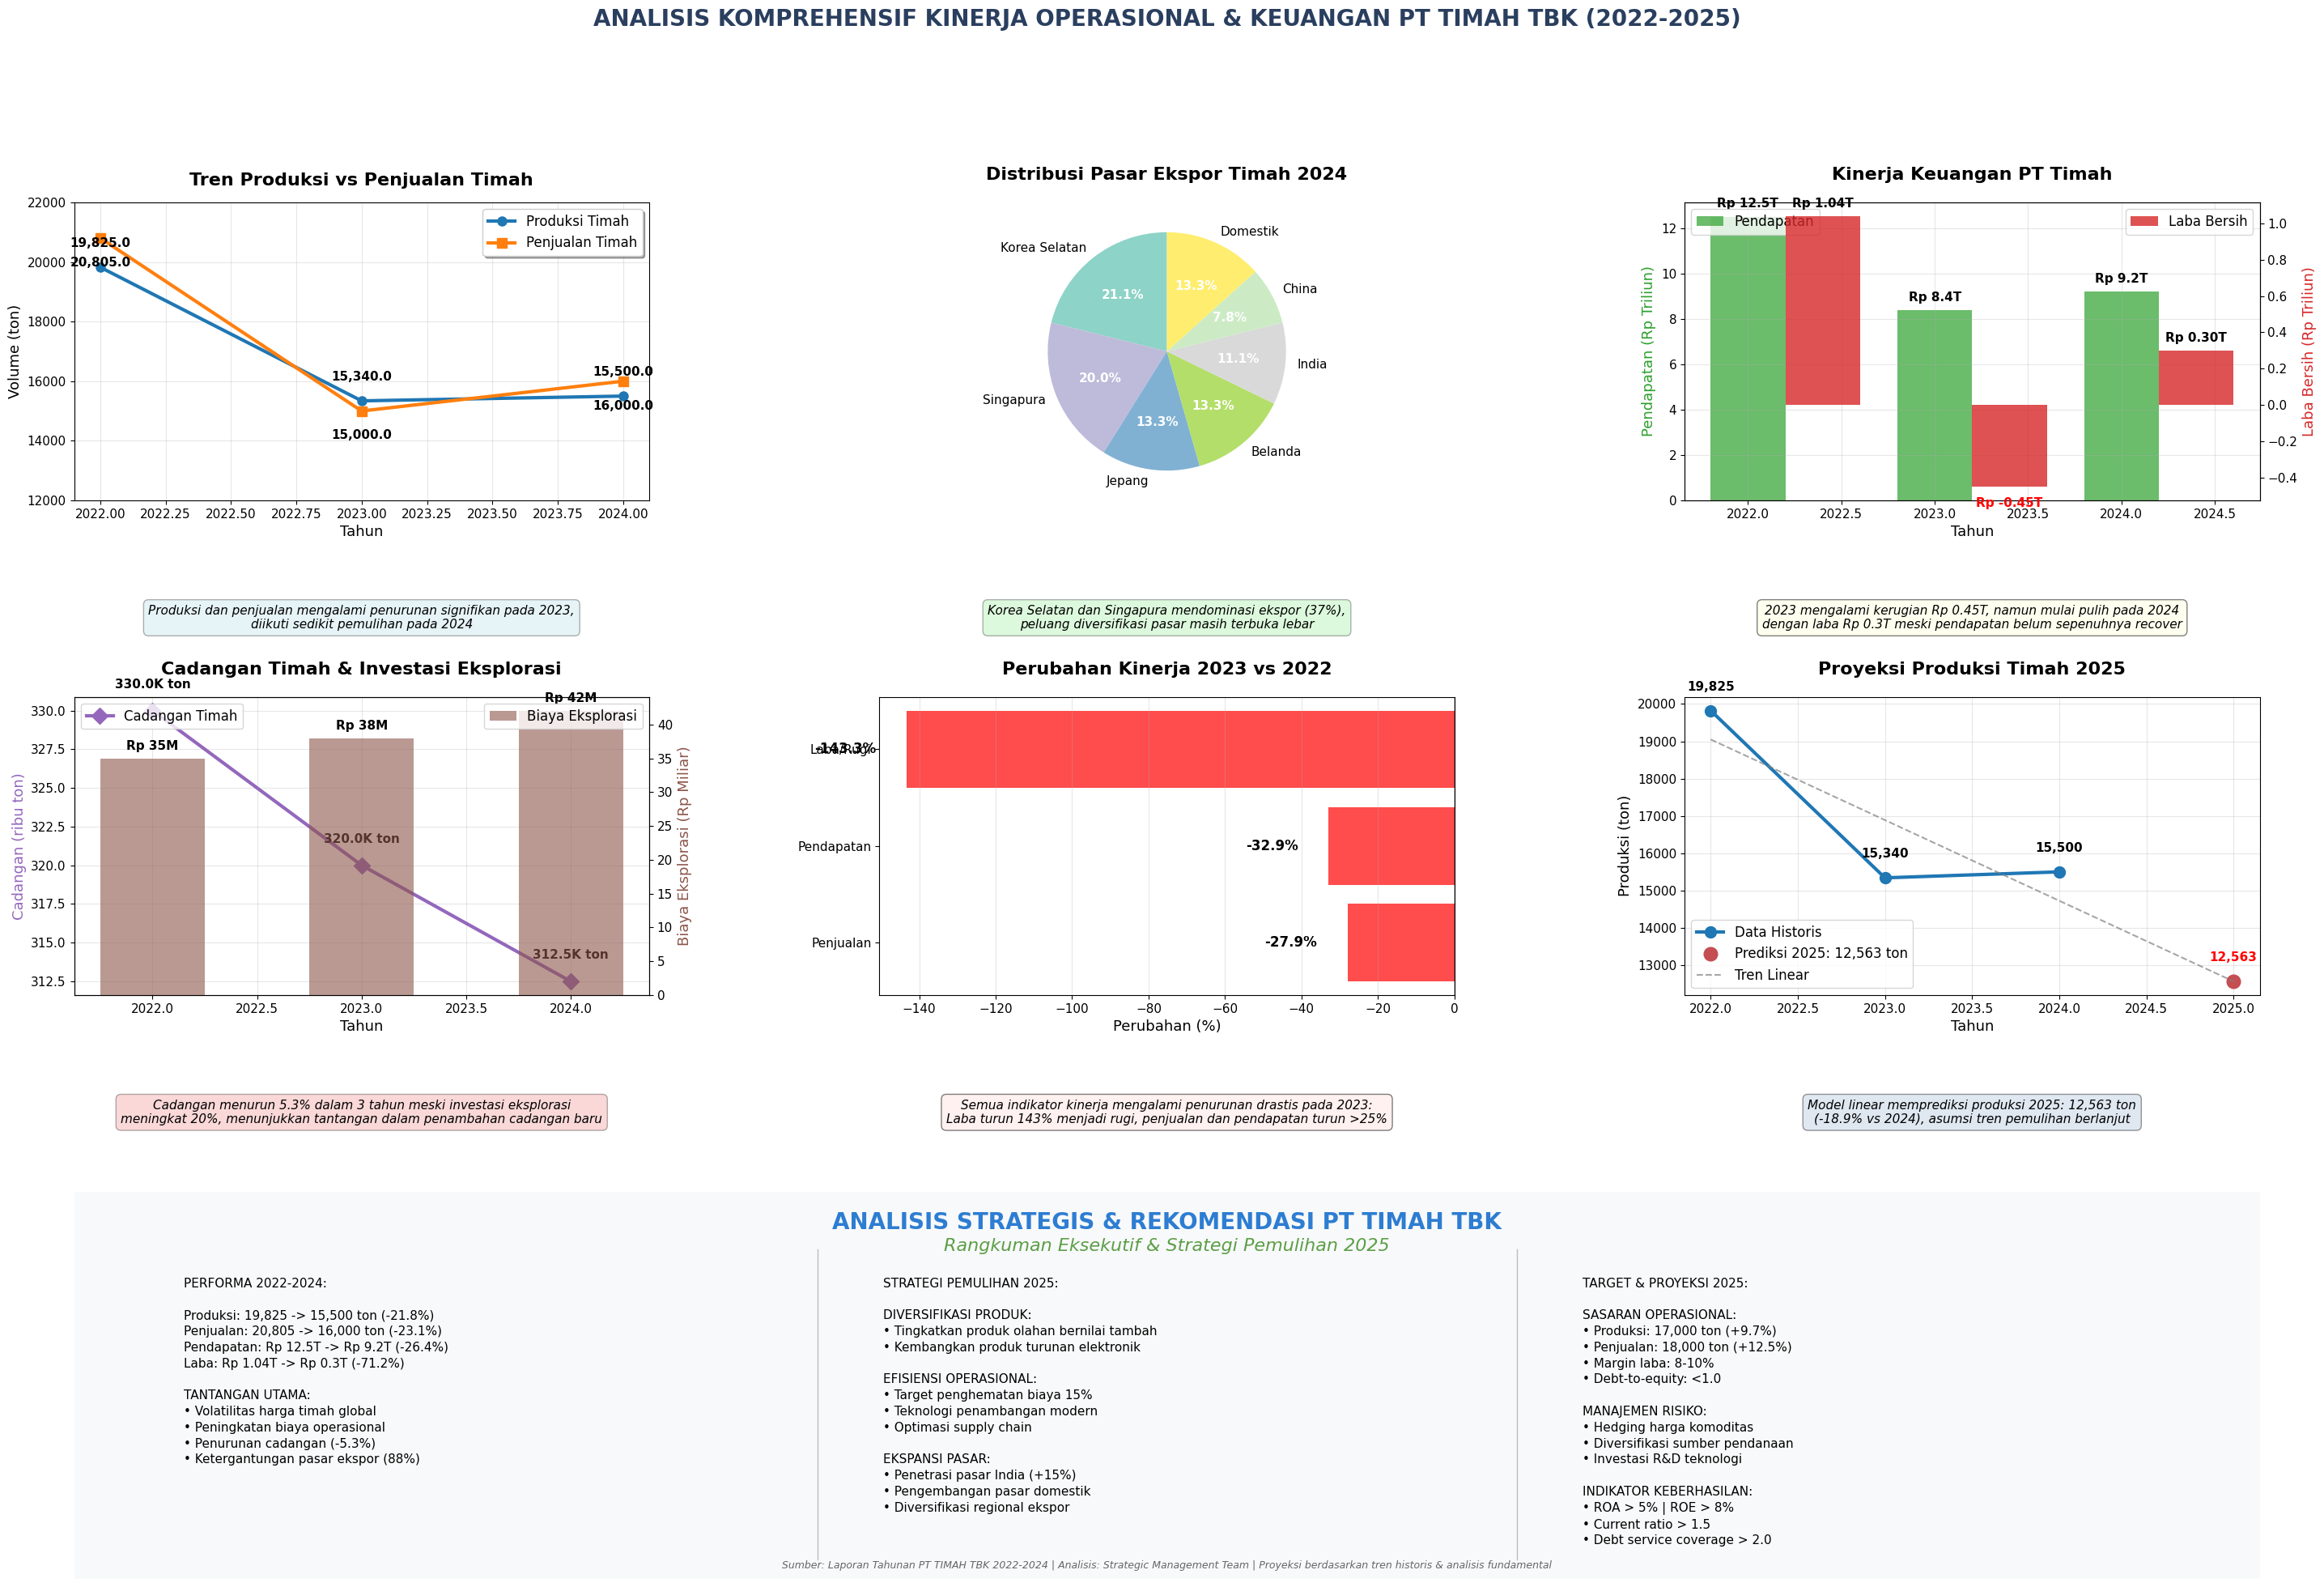


              RINGKASAN ANALISIS KINERJA PT TIMAH TBK (2022-2024)               

METRIK                            2022         2023         2024     Δ 2023     Δ 2024
--------------------------------------------------------------------------------
Produksi Timah (ton)            19,825     15,340.0     15,500.0       N/A       N/A
Penjualan Timah (ton)           20,805     15,000.0     16,000.0     -27.9%       6.7%
Pendapatan (Rp Triliun)             12          8.4          9.2     -32.9%       9.7%
Laba Bersih (Rp Triliun)             1         -0.5          0.3    -143.3%    -166.7%

PROYEKSI 2025                 Produksi       Target       Asumsi
------------------------------------------------------------
Prediksi Linear                 12,563       17,000      Optimis

                        REKOMENDASI PRIORITAS STRATEGIS:                        
1. Fokus pada efisiensi biaya untuk meningkatkan profitabilitas
2. Diversifikasi produk dengan nilai tambah tinggi (refined tin p

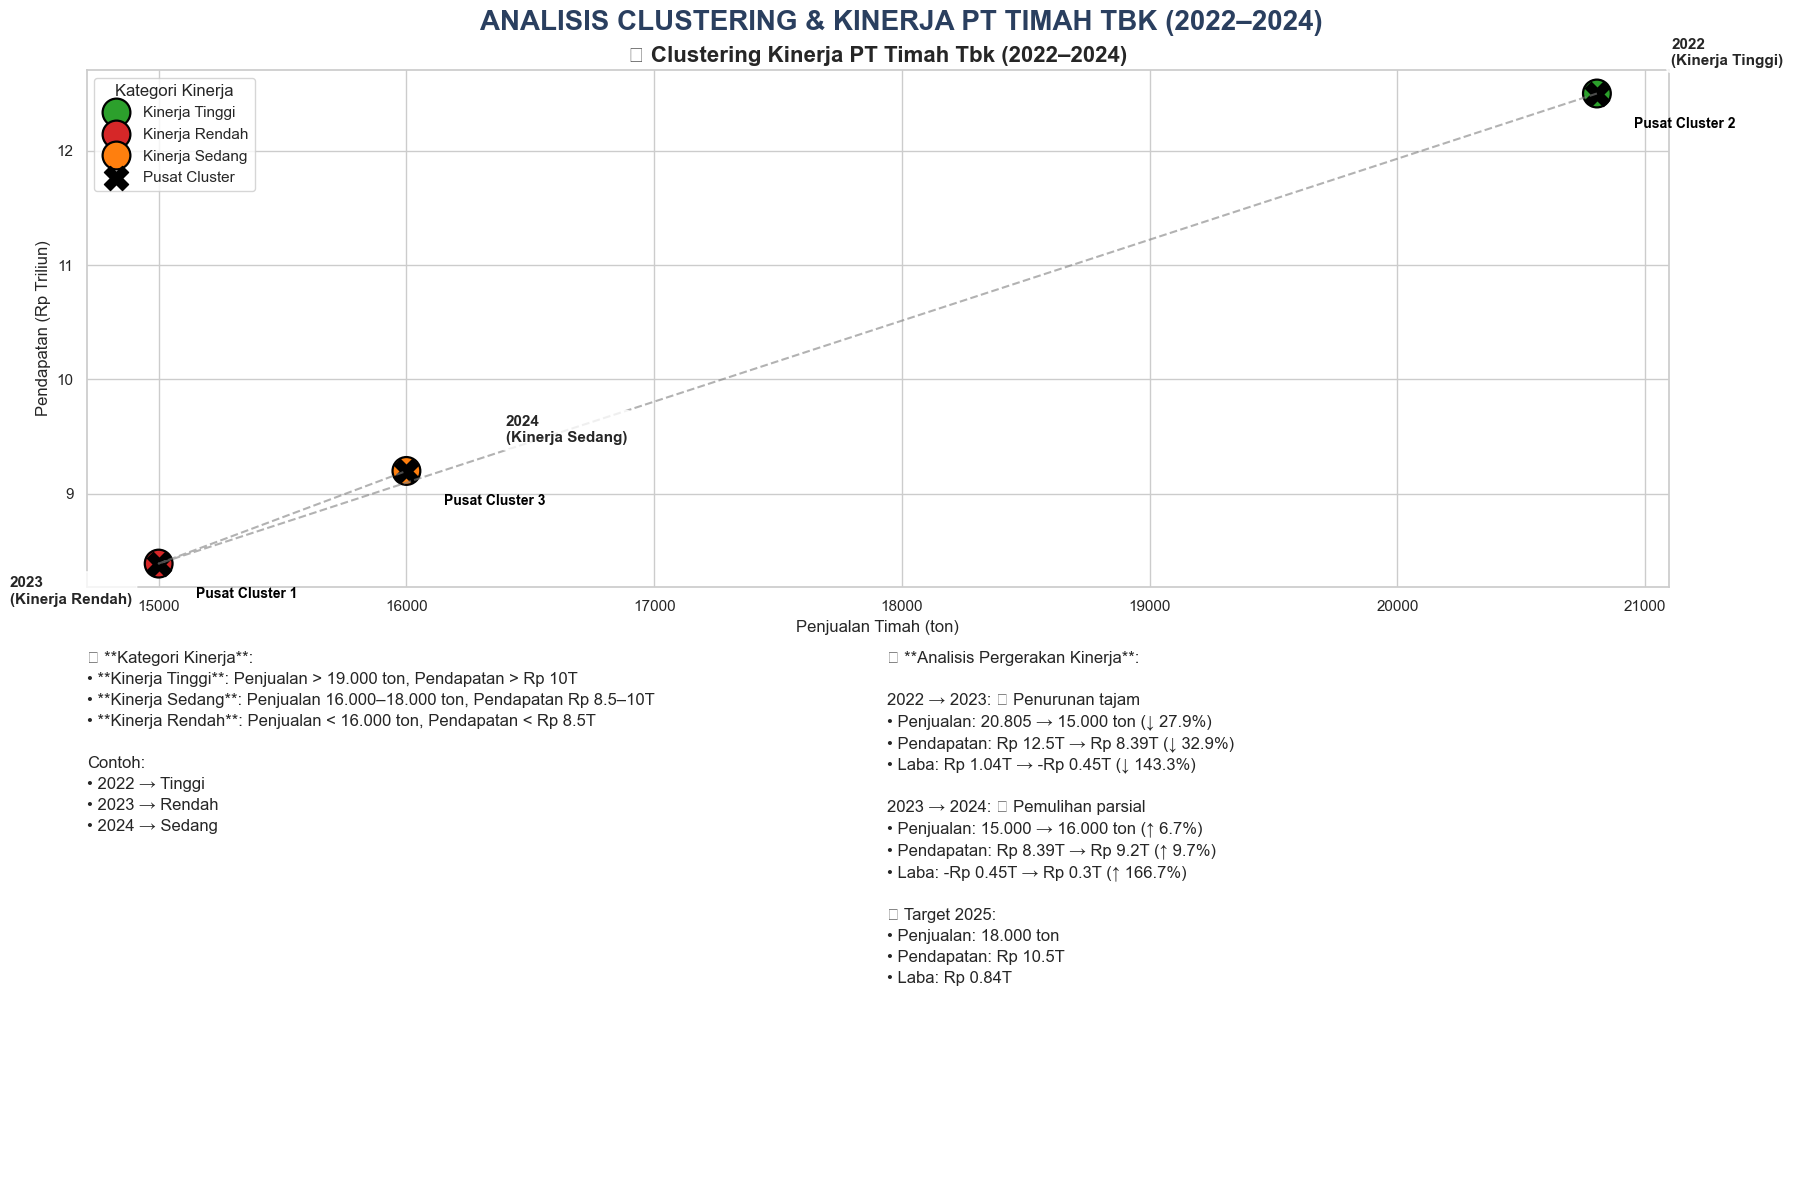

In [ ]:
#  Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#  Konfigurasi Visual 
plt.style.use('default')
CORPORATE_COLORS = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]
sns.set_palette(CORPORATE_COLORS)

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.titleweight': 'bold',
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'figure.facecolor': 'white'
})

#  Dataset Aktual PT TIMAH TBK (2022-2024)
data = {
    'Tahun': [2022, 2023, 2024],
    'Produksi Timah (ton)': [19825, 15340, 15500],
    'Penjualan Timah (ton)': [20805, 15000, 16000],
    'Pendapatan (Rp Triliun)': [12.5, 8.39, 9.2],
    'Laba Bersih (Rp Triliun)': [1.04, -0.45, 0.3],
    'Biaya Eksplorasi (Rp Miliar)': [35, 38, 42],
    'Cadangan (ribu ton)': [330, 320, 312.5],
    'Sumber Daya (ribu ton)': [810, 805, 807.2]
}
df = pd.DataFrame(data)

#  Kalkulasi Perubahan Persentase
for col in ['Penjualan Timah (ton)', 'Pendapatan (Rp Triliun)', 'Laba Bersih (Rp Triliun)']:
    df[f'Perubahan {col.split()[0]} (%)'] = df[col].pct_change() * 100

#  Setup Layout Figure dengan GridSpec
fig = plt.figure(figsize=(30, 20))
gs = GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4, 
              height_ratios=[1, 1, 1.3], width_ratios=[1, 1, 1])

# =============================================================================
# GRAFIK 1: TREN PRODUKSI & PENJUALAN (2022-2024)
# =============================================================================
ax1 = plt.subplot(gs[0, 0])

# Plot garis dengan marker 
line1 = ax1.plot(df['Tahun'], df['Produksi Timah (ton)'], 
                 marker='o', markersize=8, linewidth=3, 
                 label='Produksi Timah', color=CORPORATE_COLORS[0])
line2 = ax1.plot(df['Tahun'], df['Penjualan Timah (ton)'], 
                 marker='s', markersize=8, linewidth=3, 
                 label='Penjualan Timah', color=CORPORATE_COLORS[1])

# Anotasi nilai pada setiap titik
for i, row in df.iterrows():
    ax1.annotate(f"{row['Produksi Timah (ton)']:,}", 
                (row['Tahun'], row['Produksi Timah (ton)']),
                textcoords="offset points", xytext=(0,18), 
                ha='center', fontsize=11, fontweight='bold')
    ax1.annotate(f"{row['Penjualan Timah (ton)']:,}", 
                (row['Tahun'], row['Penjualan Timah (ton)']),
                textcoords="offset points", xytext=(0,-25), 
                ha='center', fontsize=11, fontweight='bold')

ax1.set_title("Tren Produksi vs Penjualan Timah", pad=15)
ax1.set_xlabel("Tahun")
ax1.set_ylabel("Volume (ton)")
ax1.legend(loc='upper right', frameon=True, shadow=True)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(12000, 22000)

# Caption penjelasan
caption1 = "Produksi dan penjualan mengalami penurunan signifikan pada 2023,\ndiikuti sedikit pemulihan pada 2024"
ax1.text(0.5, -0.35, caption1, transform=ax1.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', alpha=0.3))

# =============================================================================
# GRAFIK 2: DISTRIBUSI PASAR EKSPOR (2024)
# =============================================================================
ax2 = plt.subplot(gs[0, 1])

ekspor_data = {
    "Korea Selatan": 19,
    "Singapura": 18,
    "Jepang": 12,
    "Belanda": 12,
    "India": 10,
    "China": 7,
    "Domestik": 12
}

# Pie chart 
colors = plt.cm.Set3(np.linspace(0, 1, len(ekspor_data)))
wedges, texts, autotexts = ax2.pie(ekspor_data.values(), 
                                   labels=ekspor_data.keys(), 
                                   autopct='%1.1f%%', 
                                   startangle=90,
                                   colors=colors,
                                   textprops={'fontsize': 11})


for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax2.set_title("Distribusi Pasar Ekspor Timah 2024", pad=20)

# Caption penjelasan
caption2 = "Korea Selatan dan Singapura mendominasi ekspor (37%),\npeluang diversifikasi pasar masih terbuka lebar"
ax2.text(0.5, -0.35, caption2, transform=ax2.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.3))

# =============================================================================
# GRAFIK 3: KINERJA KEUANGAN (PENDAPATAN & LABA)
# =============================================================================
ax3 = plt.subplot(gs[0, 2])

# Bar chart  pendapatan
bars1 = ax3.bar(df['Tahun'], df['Pendapatan (Rp Triliun)'], 
                alpha=0.7, label='Pendapatan', color=CORPORATE_COLORS[2], width=0.4)

# Twin axis  laba
ax3b = ax3.twinx()
bars2 = ax3b.bar([x+0.4 for x in df['Tahun']], df['Laba Bersih (Rp Triliun)'], 
                 alpha=0.8, label='Laba Bersih', color=CORPORATE_COLORS[3], width=0.4)

# Anotasi nilai
for i, (rev, profit) in enumerate(zip(df['Pendapatan (Rp Triliun)'], df['Laba Bersih (Rp Triliun)'])):
    ax3.annotate(f"Rp {rev:.1f}T", (df['Tahun'].iloc[i], rev),
                textcoords="offset points", xytext=(0,8), 
                ha='center', fontsize=11, fontweight='bold')
    
    ax3b.annotate(f"Rp {profit:.2f}T", (df['Tahun'].iloc[i]+0.4, profit),
                 textcoords="offset points", xytext=(0,8 if profit>=0 else -18), 
                 ha='center', fontsize=11, fontweight='bold',
                 color='red' if profit < 0 else 'black')

ax3.set_title("Kinerja Keuangan PT Timah", pad=20)
ax3.set_xlabel("Tahun")
ax3.set_ylabel("Pendapatan (Rp Triliun)", color=CORPORATE_COLORS[2])
ax3b.set_ylabel("Laba Bersih (Rp Triliun)", color=CORPORATE_COLORS[3])
ax3.legend(loc='upper left')
ax3b.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Caption penjelasan
caption3 = "2023 mengalami kerugian Rp 0.45T, namun mulai pulih pada 2024\ndengan laba Rp 0.3T meski pendapatan belum sepenuhnya recover"
ax3.text(0.5, -0.35, caption3, transform=ax3.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.5))

# =============================================================================
# GRAFIK 4: CADANGAN & INVESTASI EKSPLORASI
# =============================================================================
ax4 = plt.subplot(gs[1, 0])

# Plot cadangan sebagai line chart
line_cadangan = ax4.plot(df['Tahun'], df['Cadangan (ribu ton)'], 
                        marker='D', markersize=10, linewidth=3,
                        label='Cadangan Timah', color=CORPORATE_COLORS[4])

# Twin axis untuk biaya eksplorasi
ax4b = ax4.twinx()
bars_eksplorasi = ax4b.bar(df['Tahun'], df['Biaya Eksplorasi (Rp Miliar)'], 
                          alpha=0.6, label='Biaya Eksplorasi', 
                          color=CORPORATE_COLORS[5], width=0.5)

# Anotasi
for i, row in df.iterrows():
    ax4.annotate(f"{row['Cadangan (ribu ton)']:.1f}K ton", 
                (row['Tahun'], row['Cadangan (ribu ton)']),
                textcoords="offset points", xytext=(0,20), 
                ha='center', fontsize=11, fontweight='bold')
    ax4b.annotate(f"Rp {int(row['Biaya Eksplorasi (Rp Miliar)'])}M", 
                 (row['Tahun'], row['Biaya Eksplorasi (Rp Miliar)']),
                 textcoords="offset points", xytext=(0,8), 
                 ha='center', fontsize=11, fontweight='bold')

ax4.set_title("Cadangan Timah & Investasi Eksplorasi", pad=20)
ax4.set_xlabel("Tahun")
ax4.set_ylabel("Cadangan (ribu ton)", color=CORPORATE_COLORS[4])
ax4b.set_ylabel("Biaya Eksplorasi (Rp Miliar)", color=CORPORATE_COLORS[5])
ax4.legend(loc='upper left')
ax4b.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

# Caption penjelasan
caption4 = "Cadangan menurun 5.3% dalam 3 tahun meski investasi eksplorasi\nmeningkat 20%, menunjukkan tantangan dalam penambahan cadangan baru"
ax4.text(0.5, -0.35, caption4, transform=ax4.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightcoral', alpha=0.3))

# =============================================================================
# GRAFIK 5: PERUBAHAN KINERJA (2023 vs 2022) 
# =============================================================================
ax5 = plt.subplot(gs[1, 1])

# Data perubahan
change_2023 = [df.iloc[1]['Perubahan Penjualan (%)'], 
               df.iloc[1]['Perubahan Pendapatan (%)'], 
               df.iloc[1]['Perubahan Laba (%)']]
change_labels = ['Penjualan', 'Pendapatan', 'Laba/Rugi']

# Warna berdasarkan nilai (merah untuk negatif, hijau untuk positif)
bar_colors = ['red' if x < 0 else 'green' for x in change_2023]
bars = ax5.barh(change_labels, change_2023, color=bar_colors, alpha=0.7)

# Anotasi nilai
for i, v in enumerate(change_2023):
    ha = 'left' if v >= 0 else 'right'
    offset = 8 if v >= 0 else -8
    ax5.text(v + offset, i, f'{v:.1f}%', 
            ha=ha, va='center', fontweight='bold', fontsize=12)

ax5.set_title('Perubahan Kinerja 2023 vs 2022', pad=20)
ax5.set_xlabel('Perubahan (%)')
ax5.axvline(0, color='black', linewidth=1)
ax5.grid(True, axis='x', alpha=0.3)

# Caption penjelasan
caption5 = "Semua indikator kinerja mengalami penurunan drastis pada 2023:\nLaba turun 143% menjadi rugi, penjualan dan pendapatan turun >25%"
ax5.text(0.5, -0.35, caption5, transform=ax5.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='mistyrose', alpha=0.5))

# =============================================================================
# GRAFIK 6: PROYEKSI PRODUKSI 2025
# =============================================================================
ax6 = plt.subplot(gs[1, 2])

# Model prediksi linear
X = df['Tahun'].values.reshape(-1, 1)
y = df['Produksi Timah (ton)'].values
model = LinearRegression().fit(X, y)
prediksi_2025 = model.predict([[2025]])[0]

# Plot data historis dan prediksi
tahun_extended = list(df['Tahun']) + [2025]
X_extended = np.array(tahun_extended).reshape(-1, 1)
prediksi_extended = model.predict(X_extended)

ax6.plot(df['Tahun'], y, marker='o', markersize=10, linewidth=3, 
         label='Data Historis', color=CORPORATE_COLORS[0])
ax6.plot(2025, prediksi_2025, 'ro', markersize=12, 
         label=f'Prediksi 2025: {prediksi_2025:,.0f} ton')
ax6.plot(tahun_extended, prediksi_extended, 
         linestyle='--', color='gray', alpha=0.7, label='Tren Linear')

# Anotasi
for i, val in enumerate(y):
    ax6.annotate(f"{val:,}", (df['Tahun'].iloc[i], val),
                textcoords="offset points", xytext=(0,18), 
                ha='center', fontsize=11, fontweight='bold')

ax6.annotate(f"{prediksi_2025:,.0f}", (2025, prediksi_2025),
            textcoords="offset points", xytext=(0,18), 
            ha='center', fontsize=11, fontweight='bold', color='red')

ax6.set_title("Proyeksi Produksi Timah 2025", pad=20)
ax6.set_xlabel("Tahun")
ax6.set_ylabel("Produksi (ton)")
ax6.legend(loc='lower left')
ax6.grid(True, alpha=0.3)

# Caption penjelasan
improvement_pct = ((prediksi_2025/15500)-1)*100
caption6 = f"Model linear memprediksi produksi 2025: {prediksi_2025:,.0f} ton\n({improvement_pct:+.1f}% vs 2024), asumsi tren pemulihan berlanjut"
ax6.text(0.5, -0.35, caption6, transform=ax6.transAxes, 
         ha='center', va='top', fontsize=11, style='italic',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightsteelblue', alpha=0.4))

# =============================================================================
# ANALISIS STRATEGIS & REKOMENDASI (GRAFIK BESAR)
# =============================================================================
ax7 = plt.subplot(gs[2, :])
ax7.axis('off')

# Background box
box = FancyBboxPatch((0.01, 0.01), 0.98, 0.98,
                     boxstyle="round,pad=0.02", 
                     facecolor='#f8f9fa', edgecolor='#2D7DD2', 
                     linewidth=2, alpha=0.9)
ax7.add_patch(box)

# Header
ax7.text(0.5, 0.95, "ANALISIS STRATEGIS & REKOMENDASI PT TIMAH TBK", 
         transform=ax7.transAxes, ha='center', va='top', 
         fontsize=20, fontweight='bold', color='#2D7DD2')

ax7.text(0.5, 0.88, "Rangkuman Eksekutif & Strategi Pemulihan 2025", 
         transform=ax7.transAxes, ha='center', va='top', 
         fontsize=16, style='italic', color='#5C9E47')

# Konten dalam 3 kolom
col1_content = """
PERFORMA 2022-2024:

Produksi: 19,825 -> 15,500 ton (-21.8%)
Penjualan: 20,805 -> 16,000 ton (-23.1%)  
Pendapatan: Rp 12.5T -> Rp 9.2T (-26.4%)
Laba: Rp 1.04T -> Rp 0.3T (-71.2%)

TANTANGAN UTAMA:
• Volatilitas harga timah global
• Peningkatan biaya operasional
• Penurunan cadangan (-5.3%)
• Ketergantungan pasar ekspor (88%)
"""

col2_content = """
STRATEGI PEMULIHAN 2025:

DIVERSIFIKASI PRODUK:
• Tingkatkan produk olahan bernilai tambah
• Kembangkan produk turunan elektronik

EFISIENSI OPERASIONAL:  
• Target penghematan biaya 15%
• Teknologi penambangan modern
• Optimasi supply chain

EKSPANSI PASAR:
• Penetrasi pasar India (+15%)
• Pengembangan pasar domestik
• Diversifikasi regional ekspor
"""

col3_content = """
TARGET & PROYEKSI 2025:

SASARAN OPERASIONAL:
• Produksi: 17,000 ton (+9.7%)
• Penjualan: 18,000 ton (+12.5%)
• Margin laba: 8-10%
• Debt-to-equity: <1.0

MANAJEMEN RISIKO:
• Hedging harga komoditas
• Diversifikasi sumber pendanaan
• Investasi R&D teknologi

INDIKATOR KEBERHASILAN:
• ROA > 5% | ROE > 8%
• Current ratio > 1.5
• Debt service coverage > 2.0
"""

# Render konten 3 kolom
ax7.text(0.05, 0.82, col1_content, transform=ax7.transAxes, 
         ha='left', va='top', fontsize=11, linespacing=1.4)
ax7.text(0.37, 0.82, col2_content, transform=ax7.transAxes, 
         ha='left', va='top', fontsize=11, linespacing=1.4)
ax7.text(0.69, 0.82, col3_content, transform=ax7.transAxes, 
         ha='left', va='top', fontsize=11, linespacing=1.4)

# Separator lines
ax7.axvline(x=0.34, ymin=0.05, ymax=0.85, color='gray', alpha=0.5, linewidth=1)
ax7.axvline(x=0.66, ymin=0.05, ymax=0.85, color='gray', alpha=0.5, linewidth=1)

# Footer
footer = "Sumber: Laporan Tahunan PT TIMAH TBK 2022-2024 | Analisis: Strategic Management Team | Proyeksi berdasarkan tren historis & analisis fundamental"
ax7.text(0.5, 0.02, footer, transform=ax7.transAxes, 
         ha='center', va='bottom', fontsize=9, color='#666666', style='italic')

# =============================================================================
# JUDUL UTAMA & FINALISASI
# =============================================================================
plt.suptitle(
    "ANALISIS KOMPREHENSIF KINERJA OPERASIONAL & KEUANGAN PT TIMAH TBK (2022-2025)", 
    fontsize=20, fontweight='bold', color='#2A3F5F', y=1.02
)

plt.subplots_adjust(top=0.90, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)
plt.show()

# =============================================================================
# SUMMARY STATISTIK
# =============================================================================
print("\n" + "="*80)
print("RINGKASAN ANALISIS KINERJA PT TIMAH TBK (2022-2024)".center(80))
print("="*80)

# Tabel performa
metrics = ['Produksi Timah (ton)', 'Penjualan Timah (ton)', 'Pendapatan (Rp Triliun)', 'Laba Bersih (Rp Triliun)']
print(f"\n{'METRIK':<25} {'2022':>12} {'2023':>12} {'2024':>12} {'Δ 2023':>10} {'Δ 2024':>10}")
print("-" * 80)

for metric in metrics:
    vals = df[metric].tolist()
    try:
        chg23 = df.iloc[1][f"Perubahan {metric.split()[0]} (%)"]
        chg24 = df.iloc[2][f"Perubahan {metric.split()[0]} (%)"] 
        print(f"{metric:<25} {vals[0]:>12,.0f} {vals[1]:>12,.1f} {vals[2]:>12,.1f} {chg23:>9.1f}% {chg24:>9.1f}%")
    except:
        print(f"{metric:<25} {vals[0]:>12,.0f} {vals[1]:>12,.1f} {vals[2]:>12,.1f} {'N/A':>9} {'N/A':>9}")

print(f"\n{'PROYEKSI 2025':<25} {'Produksi':>12} {'Target':>12} {'Asumsi':>12}")
print("-" * 60)
print(f"{'Prediksi Linear':<25} {prediksi_2025:>12,.0f} {'17,000':>12} {'Optimis':>12}")

print("\n" + "="*80)
print("REKOMENDASI PRIORITAS STRATEGIS:".center(80))
print("="*80)
recommendations = [
    "1. Fokus pada efisiensi biaya untuk meningkatkan profitabilitas",
    "2. Diversifikasi produk dengan nilai tambah tinggi (refined tin products)",  
    "3. Ekspansi ke pasar non-tradisional untuk mengurangi risiko konsentrasi",
    "4. Intensifikasi eksplorasi untuk menambah cadangan jangka panjang",
    "5. Implementasi hedging strategy untuk mitigasi volatilitas harga"
]

for rec in recommendations:
    print(rec)
    
print("="*80)

# =============================================================================
# ANALISIS CLUSTERING (GRAFIK TERPISAH)
# =============================================================================
print("\n\n" + "="*100)
print("ANALISIS CLUSTERING KINERJA PT TIMAH TBK (2022-2024)".center(100))
print("="*100)

# === CLUSTERING ===
X = df[['Penjualan Timah (ton)', 'Pendapatan (Rp Triliun)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Manual mapping cluster 
cluster_mapping = {
    df.loc[df['Tahun'] == 2022, 'Cluster'].values[0]: 'Kinerja Tinggi',
    df.loc[df['Tahun'] == 2023, 'Cluster'].values[0]: 'Kinerja Rendah',
    df.loc[df['Tahun'] == 2024, 'Cluster'].values[0]: 'Kinerja Sedang',
}
df['Kategori Kinerja'] = df['Cluster'].map(cluster_mapping)

# Warna kinerja
palette = {
    'Kinerja Tinggi': '#2ca02c',
    'Kinerja Sedang': '#ff7f0e',
    'Kinerja Rendah': '#d62728'
}

# === FIGURE ===
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# --- PLOT CLUSTER ---
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.scatterplot(
    data=df,
    x='Penjualan Timah (ton)',
    y='Pendapatan (Rp Triliun)',
    hue='Kategori Kinerja',
    palette=palette,
    s=400,
    edgecolor='black',
    ax=ax1
)

# Garis penghubung antar tahun
ax1.plot(df['Penjualan Timah (ton)'], df['Pendapatan (Rp Triliun)'], 
         color='gray', linestyle='--', linewidth=1.5, alpha=0.6)

# Anotasi tahun
offset = [(300, 0.25), (-600, -0.35), (400, 0.25)]
for i in range(len(df)):
    x = df.loc[i, 'Penjualan Timah (ton)'] + offset[i][0]
    y = df.loc[i, 'Pendapatan (Rp Triliun)'] + offset[i][1]
    tahun = df.loc[i, 'Tahun']
    label = df.loc[i, 'Kategori Kinerja']
    ax1.text(x, y, f"{tahun}\n({label})", fontsize=11, weight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Pusat cluster
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=300, marker='X', label='Pusat Cluster')
for i, (cx, cy) in enumerate(centers):
    ax1.text(cx + 150, cy - 0.3, f'Pusat Cluster {i+1}', fontsize=10, color='black', weight='bold')

ax1.set_title(" Clustering Kinerja PT Timah Tbk (2022–2024)", fontsize=16, weight='bold')
ax1.set_xlabel("Penjualan Timah (ton)", fontsize=12)
ax1.set_ylabel("Pendapatan (Rp Triliun)", fontsize=12)
ax1.legend(title='Kategori Kinerja', fontsize=11, title_fontsize=12, loc='upper left')

# --- PENJELASAN CLUSTER ---
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.axis('off')
text_cluster = (
    " **Kategori Kinerja**:\n"
    "• **Kinerja Tinggi**: Penjualan > 19.000 ton, Pendapatan > Rp 10T\n"
    "• **Kinerja Sedang**: Penjualan 16.000–18.000 ton, Pendapatan Rp 8.5–10T\n"
    "• **Kinerja Rendah**: Penjualan < 16.000 ton, Pendapatan < Rp 8.5T\n"
    "\nContoh:\n• 2022 → Tinggi\n• 2023 → Rendah\n• 2024 → Sedang"
)
ax2.text(0, 1, text_cluster, fontsize=12, va='top', linespacing=1.5)

# --- ANALISIS PERGERAKAN ---
ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.axis('off')
text_movement = (
    " **Analisis Pergerakan Kinerja**:\n\n"
    "2022 → 2023:  Penurunan tajam\n"
    "• Penjualan: 20.805 → 15.000 ton (↓ 27.9%)\n"
    "• Pendapatan: Rp 12.5T → Rp 8.39T (↓ 32.9%)\n"
    "• Laba: Rp 1.04T → -Rp 0.45T (↓ 143.3%)\n\n"
    "2023 → 2024:  Pemulihan parsial\n"
    "• Penjualan: 15.000 → 16.000 ton (↑ 6.7%)\n"
    "• Pendapatan: Rp 8.39T → Rp 9.2T (↑ 9.7%)\n"
    "• Laba: -Rp 0.45T → Rp 0.3T (↑ 166.7%)\n\n"
    " Target 2025:\n"
    "• Penjualan: 18.000 ton\n"
    "• Pendapatan: Rp 10.5T\n"
    "• Laba: Rp 0.84T"
)
ax3.text(0, 1, text_movement, fontsize=12, va='top', linespacing=1.5)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle("ANALISIS CLUSTERING & KINERJA PT TIMAH TBK (2022–2024)", 
             fontsize=20, weight='bold', color='#2A3F5F')
plt.show()